In [37]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [38]:
#!pip install seaborn
!pip install scikit-learn

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import itertools


%matplotlib inline
from ucimlrepo import fetch_ucirepo


In [40]:
# data link 2 - https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
# fetch dataset
adult = fetch_ucirepo(id=2)
census_income = fetch_ucirepo(id=20)
cdc_data = fetch_ucirepo(id=891)

df_data = cdc_data.data.features
df_data['target'] = cdc_data.data.targets
df_data = df_data.sample(n=2000)
df_data

/var/folders/05/vk5vcm7s76b9fshpnxw15dn40000gn/T/ipykernel_36797/494127192.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['target'] = cdc_data.data.targets


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
14480,0,1,1,30,1,0,0,1,0,1,...,0,2,0,0,0,1,3,6,7,0
137921,0,1,1,34,0,0,0,1,1,1,...,0,1,0,0,0,1,2,5,5,0
28136,1,1,1,22,0,0,0,0,1,1,...,0,2,15,0,0,0,12,6,5,1
92427,0,0,1,31,1,0,0,1,1,1,...,1,2,7,0,0,1,3,5,6,0
71454,1,0,1,22,0,0,0,1,1,1,...,0,2,0,0,0,0,9,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241728,1,1,1,29,0,0,0,1,1,0,...,1,2,0,2,0,1,8,6,4,0
141223,0,0,1,25,1,0,1,1,1,1,...,1,2,0,0,0,0,6,6,4,0
220466,1,0,1,23,0,0,0,0,1,0,...,0,4,30,30,1,0,9,2,1,0
183278,1,1,1,25,1,0,0,1,1,1,...,0,2,0,0,0,0,8,6,8,0


## Check Data
1. Missing values
2. Duplicates
3. Data types of features
4. Unique values for each feature
5. Numerical and Categorical Features


(2000, 22)
(2000, 22)
Number of duplicate records 6
Number of duplicate records 0
<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 14480 to 116571
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   HighBP                1994 non-null   int64
 1   HighChol              1994 non-null   int64
 2   CholCheck             1994 non-null   int64
 3   BMI                   1994 non-null   int64
 4   Smoker                1994 non-null   int64
 5   Stroke                1994 non-null   int64
 6   HeartDiseaseorAttack  1994 non-null   int64
 7   PhysActivity          1994 non-null   int64
 8   Fruits                1994 non-null   int64
 9   Veggies               1994 non-null   int64
 10  HvyAlcoholConsump     1994 non-null   int64
 11  AnyHealthcare         1994 non-null   int64
 12  NoDocbcCost           1994 non-null   int64
 13  GenHlth               1994 non-null   int64
 14  MentHlth             

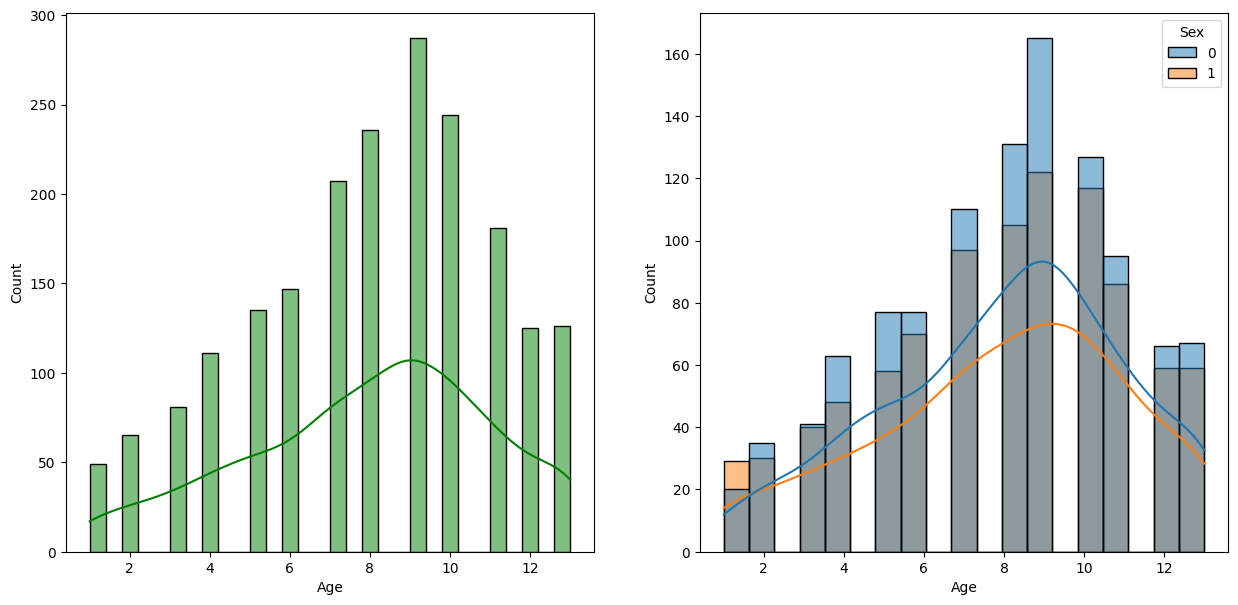

In [41]:
# 1. Missing values
df_data.isna().sum()
print(df_data.shape)
df_data.dropna(inplace=True)
print(df_data.shape)

#2 Duplicates
df_data.duplicated().sum()
print(f"Number of duplicate records {df_data.duplicated().sum()}")
df_data.drop_duplicates(inplace=True)
print(f"Number of duplicate records {df_data.duplicated().sum()}")

# Data type
df_data.info()

# Unique values of each column
df_data.nunique()

#5. Numerical and Categorical Features

numerical_features = [feature for feature in  df_data.columns if df_data[feature].dtype != 'O']
categorical_features = [feature for feature in  df_data.columns if df_data[feature].dtype == 'O']
print(" Have {} Numerical Features {} ".format(len(numerical_features),numerical_features))
print(" Have {} Categorical Features {} ".format(len(categorical_features),categorical_features))

# Data Statistics 
df_data.describe()

# Explore Data
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_data,x='Age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_data,x='Age',kde=True,hue='Sex')
plt.show()

In [42]:
df_data.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.447342,0.427783,0.962889,28.455366,0.434804,0.048646,0.093781,0.760281,0.634905,0.810431,...,0.082247,2.519559,3.091274,4.152457,0.159980,0.461384,7.979940,5.046138,6.143932,0.154463
std,0.497344,0.494881,0.189082,6.473402,0.495856,0.215181,0.291597,0.427019,0.481578,0.392058,...,0.274809,1.068111,7.207810,8.689367,0.366679,0.498632,3.054382,1.009179,2.046093,0.361483
min,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [59]:
# Explore Data
pd.set_option('display.max_rows', 500)
df_data.groupby(['Sex','target'])[['target']].count()
df_data.groupby(['Sex'])['target'].transform(lambda x: x/x.sum())

print(df_data.groupby(['Sex','target'])[['target']].count())
print(df_data.groupby(['Education','target'])[['target']].count())
print(df_data.groupby(['Veggies','target'])[['target']].count())


            target
Sex target        
0   0          924
    1          150
1   0          762
    1          158
                  target
Education target        
1         0            2
2         0           28
          1           13
3         0           53
          1           23
4         0          381
          1           96
5         0          456
          1           90
6         0          766
          1           86
                target
Veggies target        
0       0          307
        1           71
1       0         1379
        1          237


## Data Transformation

In [44]:

X = df_data.drop(['target'],axis=1)
y= df_data['target']

print(y)
num_features= X.select_dtypes(exclude="object").columns
cat_features= X.select_dtypes(include="object").columns
num_pipeline = Pipeline(
   steps=[
       ("Imputer",SimpleImputer(strategy="median")),
       ("Scaler", StandardScaler())
   ]
)
cat_pipeline= Pipeline(
    steps=[
      ("Imputer",SimpleImputer(strategy="most_frequent")),
      ("one_hot_encoder",OneHotEncoder()),
      ("scaler",StandardScaler(with_mean=False))
    ]
)
preprocessor = ColumnTransformer(
    [
      ("num_pipeline",num_pipeline, num_features) ,
      ("cat_pipeline",cat_pipeline, cat_features)

    ]
)

X= preprocessor.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
train_time={}
classifier_accuracy={}
predict_time ={}

14480     0
137921    0
28136     1
92427     0
71454     1
         ..
241728    0
141223    0
220466    0
183278    0
116571    0
Name: target, Length: 1994, dtype: int64


In [45]:
def plot_validation_curve(classifier, classifier_name, X_train, y_train,param_range,param_code,param_name,cv,is_log,x_tick):

    train_scores, test_scores = validation_curve(classifier, X_train, y_train, param_range=param_range,param_name=param_code,cv=cv)
    plt.figure()
    if is_log:
        plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Train Score')
        plt.semilogx(param_range, np.mean(test_scores, axis=1), label='CV Score')
    else:
        plt.plot(param_range, np.mean(train_scores, axis=1), label='Train Score')
        plt.plot(param_range, np.mean(test_scores, axis=1), label='CV Score')
    plt.legend()
    plt.title("Validation Curve for "+param_name+" "+classifier_name)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    if x_tick.any():
        plt.xticks(param_range)
    plt.grid()
    plt.savefig(classifier_name+'_'+param_code+'validation_curve.png')
    plt.show()

In [46]:
def plot_matrix(cm, classifier_name,normalize=False,cmap=plt.cm.Greys):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix '+ 'for '+ classifier_name)
    plt.colorbar()
    tick_marks = np.arange(len(["0","1"]))
    plt.xticks(tick_marks, ["0","1"])
    plt.yticks(tick_marks, ["0","1"])

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(2), range(2)):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    

In [47]:
def get_best_params(classifier,classifier_name,X_test,y_test,param_grid,cv):
    # Grid Search
    #param_grid = {'n_neighbors': np.arange(1,100), 'p':np.arange(1,6)}
    classifier_best = GridSearchCV(classifier, param_grid=param_grid, cv=cv)

    start_time = time.time()
    classifier_best.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time-start_time
   
    print(f"Best params for {classifier_name} : {classifier_best.best_params_}")

    start_time = time.time()
    y_predict =  classifier_best.predict(X_test)
    end_time = time.time()
    pred_time =  end_time-start_time
    
    accuracy = accuracy_score(y_test,y_predict)
    auc = roc_auc_score(y_test, y_predict)
    f1 = f1_score(y_test,y_predict)
    precision = precision_score(y_test,y_predict)
    recall = recall_score(y_test,y_predict)
    matrix = confusion_matrix(y_test,y_predict)
    
   
    print(f"{classifier_name} Evaluation Metrics ")
    print("-----------------------------------------------------")
    print("Training Time (s):   "+"{:.5f}".format(training_time))
    print("Prediction Time (s): "+"{:.5f}\n".format(pred_time))
    print("Accuracy:  "+"{:.5f}".format(accuracy))
    print("AUC:       "+"{:.5f}".format(auc))
    print("F1 Score:  "+"{:.5f}".format(f1))
    print("Precision: "+"{:.5f}".format(precision))
    print("Recall:    "+"{:.5f}".format(recall))
    
    print("-----------------------------------------------------")
    plt.figure()
    plot_matrix(matrix,classifier_name)
    plt.show()
    train_time[classifier_name]= training_time
    predict_time[classifier_name] = pred_time
    classifier_accuracy[classifier_name]=accuracy
    
   
    return classifier_best

In [48]:
def plot_learning_curve(classifier,classifier_name, X_train, y_train, train_sizes, cv, series,x_tick):
    _, train_scores, test_scores = learning_curve(classifier, X_train, y_train, train_sizes=train_sizes, cv=cv)

    plt.figure()
    plt.plot(series, np.mean(train_scores, axis=1), label='Train Score')
    plt.plot(series, np.mean(test_scores, axis=1), label='CV Score')
    plt.legend()
    plt.title("Learning Curve for "+ classifier_name)
    plt.xlabel("Percentage of Training Examples")
    plt.ylabel("Score")
    if x_tick.any():
        plt.xticks(x_tick)
    plt.grid()
    plt.savefig(classifier_name+'learning_curve.png')
    plt.show()


In [49]:
# x= time, y= classifiers

def plot_time_graph(x_series,y_series,title,x_label):
    y_ticks= np.arange(len(y_series))
    plt.figure()
    plt.barh(y_ticks, x_series)
    plt.gca().set_yticks(y_ticks)
    plt.gca().set_yticklabels(y_series)
    plt.title(title)
    plt.xlabel(x_label)
    #plt.savefig('bc_training.png', dpi=300, bbox_inches='tight')
    plt.show()

## Decision Tree

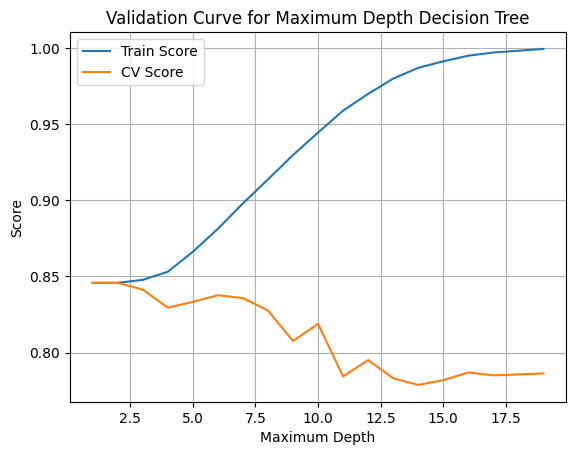

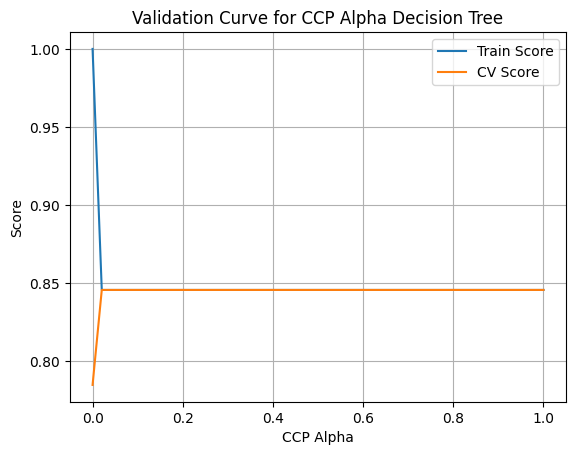

Best params for Decision Tree : {'ccp_alpha': 0.0, 'max_depth': 1}
Decision Tree Evaluation Metrics 
-----------------------------------------------------
Training Time (s):   1.58166
Prediction Time (s): 0.00017

Accuracy:  0.84461
AUC:       0.50000
F1 Score:  0.00000
Precision: 0.00000
Recall:    0.00000
-----------------------------------------------------


/Users/manish.upadhyay/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


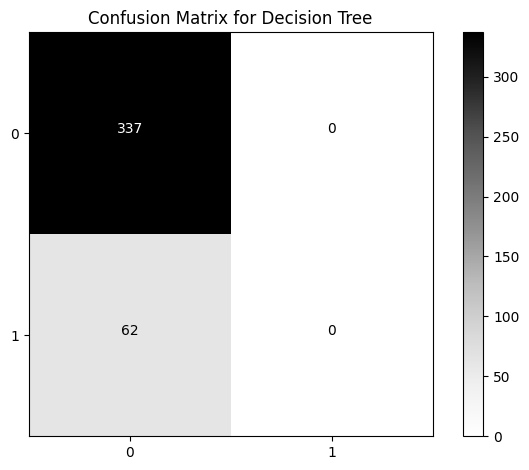

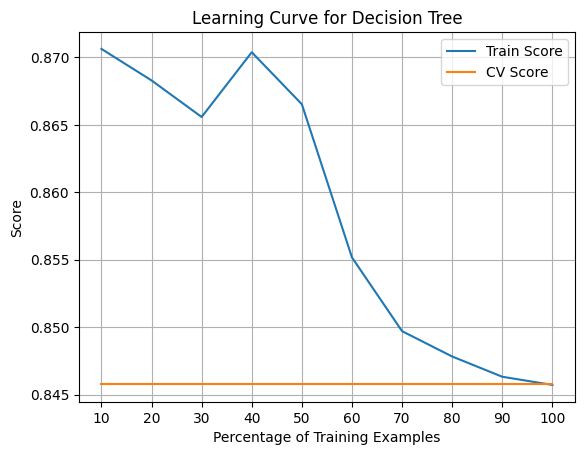

In [50]:
classifier_name = 'Decision Tree'
classifier_decision_tree = DecisionTreeClassifier(random_state=42)
cv = 10
plot_validation_curve(classifier=classifier_decision_tree,classifier_name=classifier_name, X_train=X_train, y_train=y_train,param_range=np.arange(1,20), param_code='max_depth',param_name='Maximum Depth', cv=cv,is_log=False,x_tick=np.arange(0,0))
plot_validation_curve(classifier=classifier_decision_tree,classifier_name='Decision Tree', X_train=X_train, y_train=y_train,param_range=np.linspace(0,1,50), param_code='ccp_alpha',param_name='CCP Alpha', cv=cv,is_log=False,x_tick=np.arange(0,0))

param_grid = {'max_depth': np.arange(1,20), 'ccp_alpha': np.linspace(0,0.035,10)}
classifier_decision_tree_best=get_best_params(classifier=classifier_decision_tree,classifier_name=classifier_name,X_test=X_test,y_test=y_test,param_grid=param_grid,cv=4)

classifier_decision_tree_learning = DecisionTreeClassifier(random_state=42, max_depth=classifier_decision_tree_best.best_params_['max_depth'], ccp_alpha=classifier_decision_tree_best.best_params_['ccp_alpha'])

plot_learning_curve(classifier=classifier_decision_tree_learning,classifier_name=classifier_name, X_train=X_train, y_train=y_train,train_sizes=np.linspace(0.1,1.0,10),cv=cv,series=np.linspace(0.1,1.0,10)*100,x_tick=np.linspace(0.1,1.0,10)*100)


## KNN

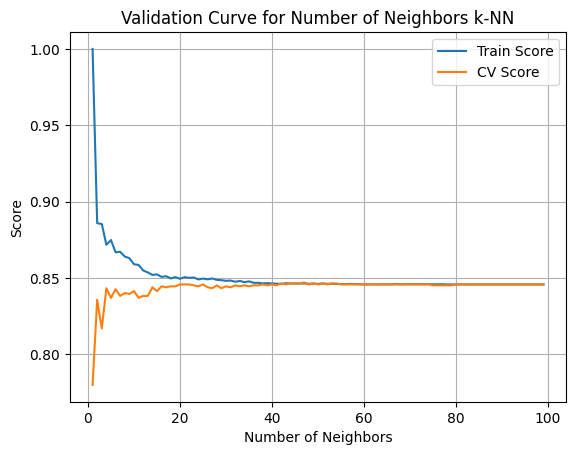

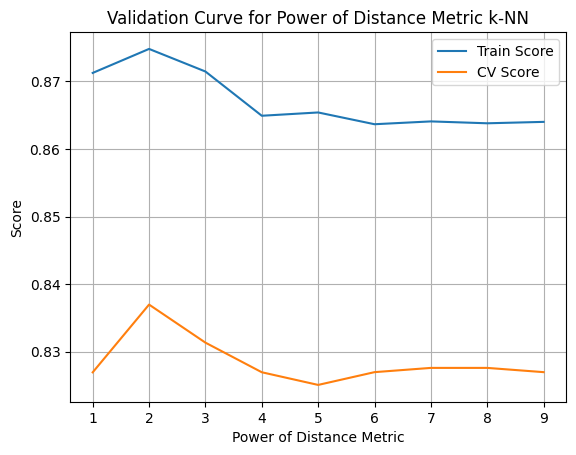

Best params for k-NN : {'n_neighbors': 29, 'p': 1}
k-NN Evaluation Metrics 
-----------------------------------------------------
Training Time (s):   142.16035
Prediction Time (s): 0.01677

Accuracy:  0.84712
AUC:       0.52781
F1 Score:  0.11594
Precision: 0.57143
Recall:    0.06452
-----------------------------------------------------


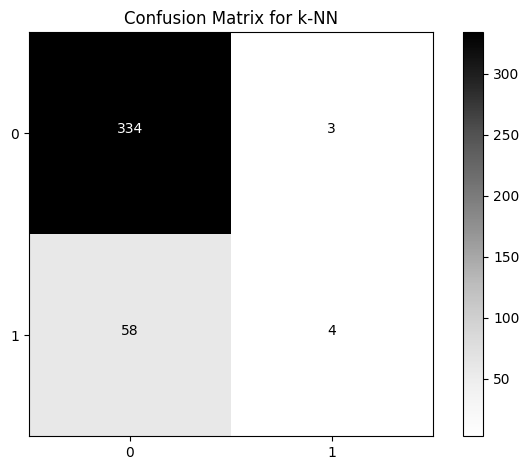

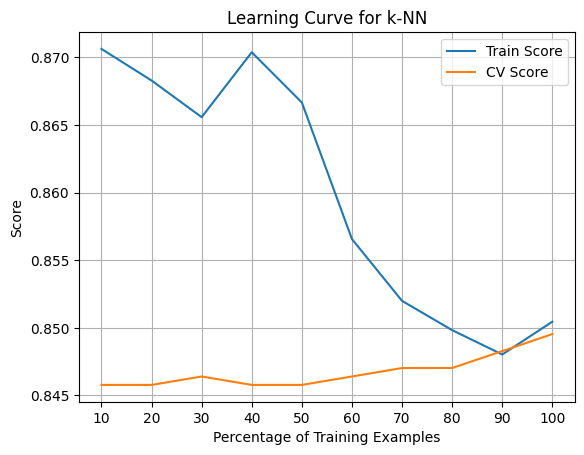

In [51]:
classifier_knn = KNeighborsClassifier()
classifier_name= 'k-NN'
cv = 10
plot_validation_curve(classifier=classifier_knn,classifier_name=classifier_name, X_train=X_train, y_train=y_train,param_range=np.arange(1,100), param_code='n_neighbors',param_name='Number of Neighbors', cv=cv,is_log=False,x_tick=np.arange(0,0))
plot_validation_curve(classifier=classifier_knn,classifier_name=classifier_name, X_train=X_train, y_train=y_train,param_range=np.arange(1,10), param_code='p',param_name='Power of Distance Metric', cv=cv,is_log=False,x_tick=np.arange(1,10))
param_grid = {'n_neighbors': np.arange(1,100), 'p':np.arange(1,6)}
classifier_knn_best=get_best_params(classifier=classifier_knn,classifier_name=classifier_name,X_test=X_test,y_test=y_test,param_grid=param_grid,cv=cv)
classifier_knn_learning = KNeighborsClassifier(n_neighbors=classifier_knn_best.best_params_['n_neighbors'], p=classifier_knn_best.best_params_['p'])

plot_learning_curve(classifier_knn_learning,classifier_name,X_train,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=cv,series=np.linspace(0.1,1.0,10)*100,x_tick=np.linspace(0.1,1.0,10)*100)


## SVM

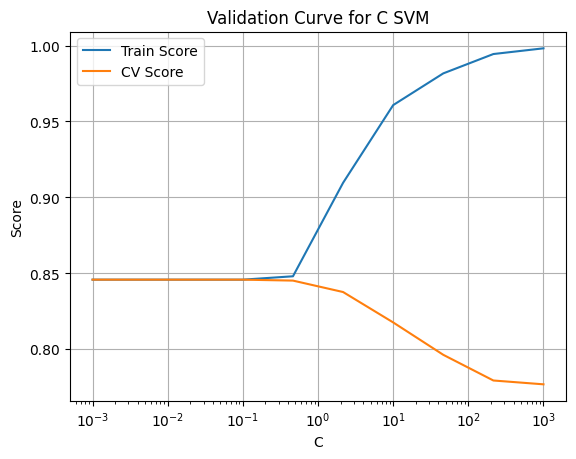

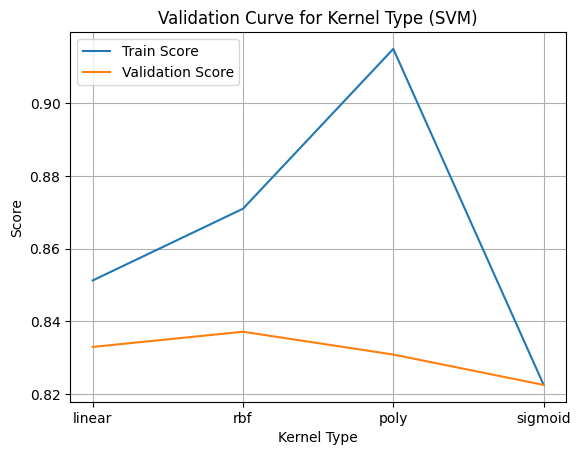

KeyboardInterrupt: 

In [52]:
classifier_name= 'SVM'
cv = 10
classifier_svm = svm.SVC(random_state=42)
plot_validation_curve(classifier=classifier_svm,classifier_name=classifier_name, X_train=X_train, y_train=y_train,param_range=np.logspace(-3,3,10), param_code='C',param_name='C', cv=cv,is_log=True,x_tick=np.arange(0,0))

train_scores = np.zeros((4,1))
test_scores = np.zeros((4,1))

classifier_svm = svm.SVC(random_state=42, kernel='linear')
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
classifier_svm.fit(X_train_train, y_train_train)
train_scores[0] = accuracy_score(y_train_train, classifier_svm.predict(X_train_train))
test_scores[0] = accuracy_score(y_train_val, classifier_svm.predict(X_train_val))

classifier_svm = svm.SVC(random_state=42, kernel='rbf')
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
classifier_svm.fit(X_train_train, y_train_train)
train_scores[1] = accuracy_score(y_train_train, classifier_svm.predict(X_train_train))
test_scores[1] = accuracy_score(y_train_val, classifier_svm.predict(X_train_val))

classifier_svm = svm.SVC(random_state=42, kernel='poly')
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
classifier_svm.fit(X_train_train, y_train_train)
train_scores[2] = accuracy_score(y_train_train, classifier_svm.predict(X_train_train))
test_scores[2] = accuracy_score(y_train_val, classifier_svm.predict(X_train_val))

classifier_svm = svm.SVC(random_state=42, kernel='sigmoid')
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
classifier_svm.fit(X_train_train, y_train_train)
train_scores[3] = accuracy_score(y_train_train, classifier_svm.predict(X_train_train))
test_scores[3] = accuracy_score(y_train_val, classifier_svm.predict(X_train_val))

plt.figure()
plt.plot(np.arange(0,4), np.mean(train_scores, axis=1), label='Train Score')
plt.plot(np.arange(0,4), np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.title("Validation Curve for Kernel Type (SVM)")
plt.xlabel("Kernel Type")
plt.ylabel("Score")
plt.grid()
plt.xticks(np.arange(4),['linear','rbf','poly','sigmoid'])
plt.show()

param_grid = {'C': np.logspace(-3,3,10), 'kernel': ['linear','rbf','poly','sigmoid']}
classifier_svm_best=get_best_params(classifier=classifier_svm,classifier_name=classifier_name,X_test=X_test,y_test=y_test,param_grid=param_grid,cv=cv)

classifier_svm_learning = svm.SVC(random_state=42, C=classifier_svm_best.best_params_['C'], kernel=classifier_svm_best.best_params_['kernel'])
plot_learning_curve(classifier_svm_learning,classifier_name,X_train,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=4,series=np.linspace(0.1,1.0,10)*100,x_tick=np.linspace(0.1,1.0,10)*100)


##  ANN

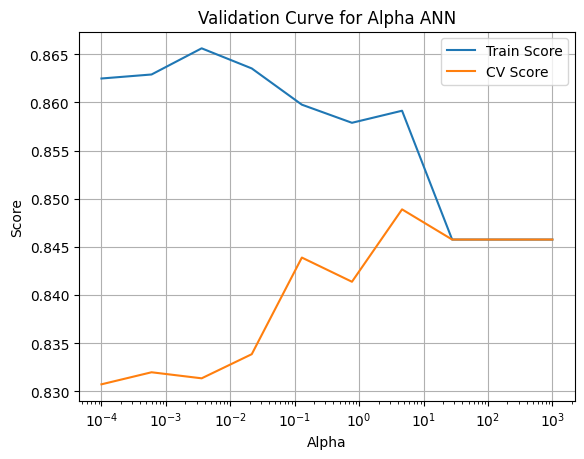

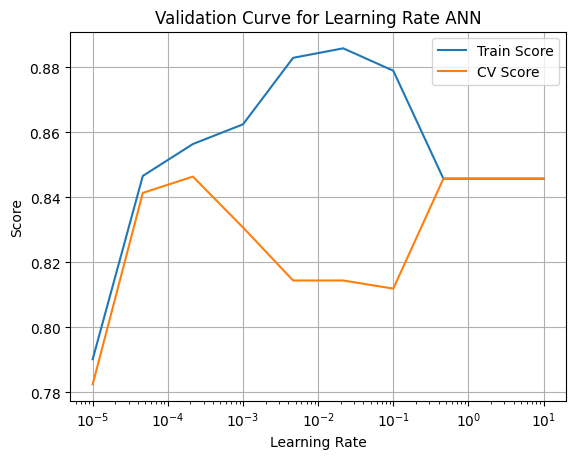

/Users/manish.upadhyay/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manish.upadhyay/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manish.upadhyay/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manish.upadhyay/miniconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  war

Best params for ANN : {'alpha': 2.154434690031882, 'learning_rate_init': 0.1}
ANN Evaluation Metrics 
-----------------------------------------------------
Training Time (s):   121.55298
Prediction Time (s): 0.00037

Accuracy:  0.85464
AUC:       0.56516
F1 Score:  0.23684
Precision: 0.64286
Recall:    0.14516
-----------------------------------------------------


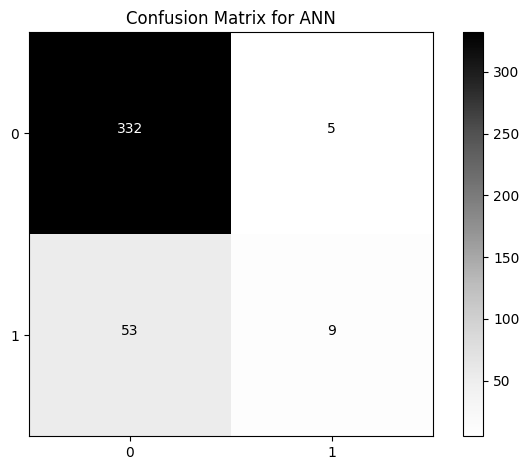

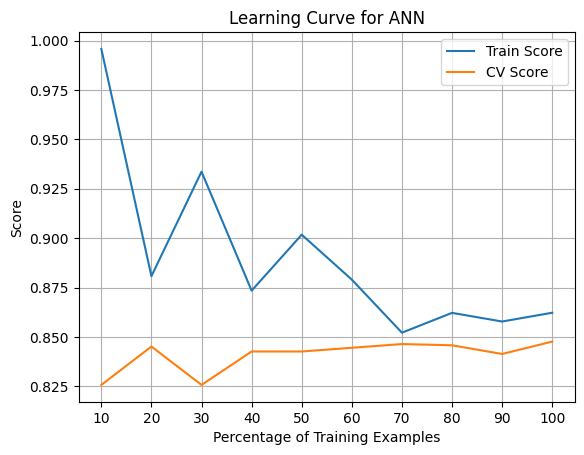

In [53]:
classifier_ann = MLPClassifier(hidden_layer_sizes=(4, 4), random_state=42, max_iter=2000)
cv=10
plot_validation_curve(classifier=classifier_ann,classifier_name='ANN', X_train=X_train, y_train=y_train,param_range=np.logspace(-4,3,10), param_code='alpha',param_name='Alpha', cv=cv,is_log=True,x_tick=np.arange(0,0))
plot_validation_curve(classifier=classifier_ann,classifier_name='ANN', X_train=X_train, y_train=y_train,param_range=np.logspace(-5,1,10), param_code='learning_rate_init',param_name='Learning Rate', cv=cv,is_log=True,x_tick=np.arange(0,0))
param_grid = {'alpha': np.logspace(-3,3,10), 'learning_rate_init': np.logspace(-5,1,10)}
classifier_ann_best = get_best_params(classifier=classifier_ann,classifier_name="ANN",X_test=X_test,y_test=y_test,param_grid=param_grid,cv=4)

classifier_ann_learning = MLPClassifier(hidden_layer_sizes=(4, 4), random_state=42, max_iter=2000, learning_rate_init=classifier_ann_best.best_params_['learning_rate_init'], alpha=classifier_ann_best.best_params_['alpha'])
plot_learning_curve(classifier_ann_learning,"ANN",X_train,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=cv,series=np.linspace(0.1,1.0,10)*100,x_tick=np.linspace(0.1,1.0,10)*100)


## Boosting

Best params for AdaBoost : {'learning_rate': 0.01, 'n_estimators': 2101}
AdaBoost Evaluation Metrics 
-----------------------------------------------------
Training Time (s):   113.23773
Prediction Time (s): 0.07835

Accuracy:  0.85213
AUC:       0.54394
F1 Score:  0.16901
Precision: 0.66667
Recall:    0.09677
-----------------------------------------------------


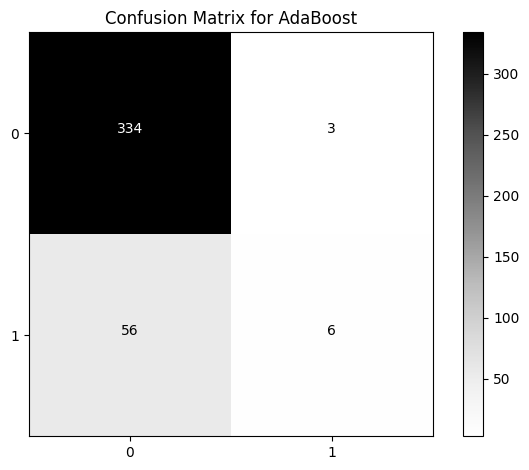

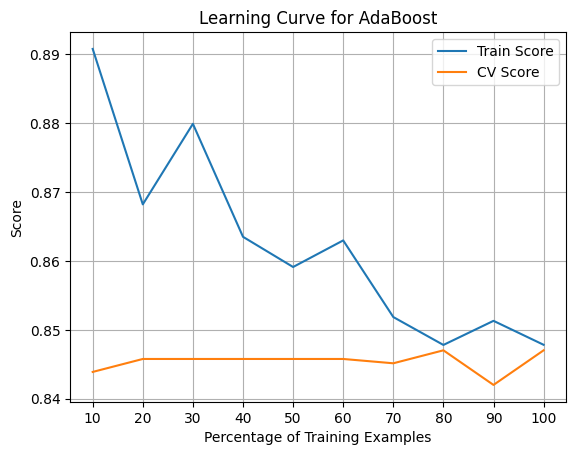

In [54]:
classifier_name='AdaBoost'
cv =10
classifier_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),algorithm='SAMME', random_state=42)
plot_validation_curve(classifier=classifier_adaboost,classifier_name=classifier_name, X_train=X_train, y_train=y_train,param_range=np.arange(1,2102,300), param_code='n_estimators',param_name='Number of Estimators', cv=cv,is_log=False,x_tick=np.arange(0,0))
plot_validation_curve(classifier=classifier_adaboost,classifier_name=classifier_name, X_train=X_train, y_train=y_train,param_range=np.logspace(-5,1,5), param_code='learning_rate',param_name='Learing Rate', cv=cv,is_log=True,x_tick=np.arange(0,0))
param_grid = {'learning_rate': np.logspace(-5,1,5), 'n_estimators': np.arange(1,2102,300)}
classifier_adaboost_best = get_best_params(classifier=classifier_adaboost,classifier_name=classifier_name,X_test=X_test,y_test=y_test,param_grid=param_grid,cv=4)

classifier_adaboost_learning = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1, min_samples_leaf=1),algorithm='SAMME', random_state=42, n_estimators=classifier_adaboost_best.best_params_['n_estimators'], learning_rate=classifier_adaboost_best.best_params_['learning_rate'])
plot_learning_curve(classifier_adaboost_learning,"AdaBoost",X_train,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=4,series=np.linspace(0.1,1.0,10)*100,x_tick=np.linspace(0.1,1.0,10)*100)



In [55]:
train_time

{'Decision Tree': 1.581658124923706,
 'k-NN': 142.16035318374634,
 'ANN': 121.552983045578,
 'AdaBoost': 113.23773312568665}

In [56]:
classifier_accuracy


{'Decision Tree': 0.8446115288220551,
 'k-NN': 0.8471177944862155,
 'ANN': 0.8546365914786967,
 'AdaBoost': 0.8521303258145363}

In [57]:
predict_time

{'Decision Tree': 0.00017404556274414062,
 'k-NN': 0.016772031784057617,
 'ANN': 0.0003669261932373047,
 'AdaBoost': 0.07835197448730469}

{'Decision Tree': 1.581658124923706, 'k-NN': 142.16035318374634, 'ANN': 121.552983045578, 'AdaBoost': 113.23773312568665}


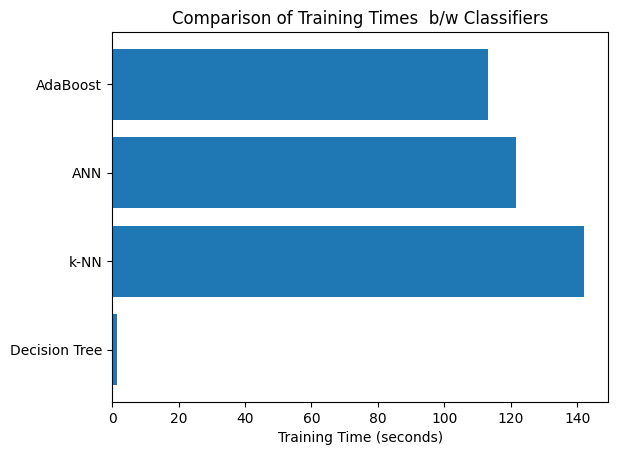

{'Decision Tree': 0.8446115288220551, 'k-NN': 0.8471177944862155, 'ANN': 0.8546365914786967, 'AdaBoost': 0.8521303258145363}


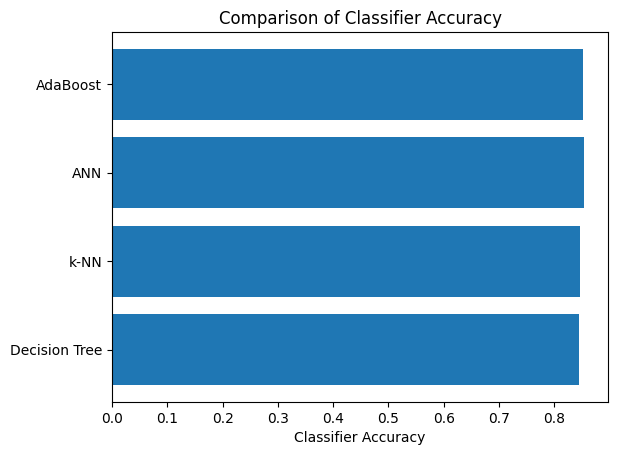

{'Decision Tree': 0.00017404556274414062, 'k-NN': 0.016772031784057617, 'ANN': 0.0003669261932373047, 'AdaBoost': 0.07835197448730469}


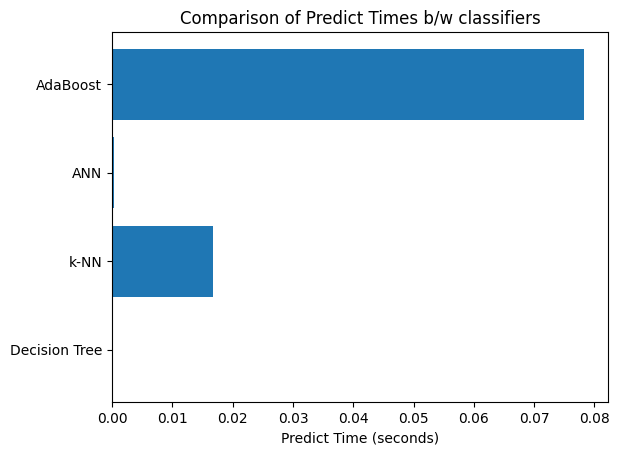

In [58]:
# Plot training time comparision between classifiers
x_series=list(train_time.values())
y_series = list(train_time.keys())
print(train_time)
plot_time_graph(x_series,y_series,'Comparison of Training Times  b/w Classifiers','Training Time (seconds)')
# plot classifier accuracy\
print(classifier_accuracy)
x_series=list(classifier_accuracy.values())
y_series = list(classifier_accuracy.keys())
plot_time_graph(x_series,y_series,'Comparison of Classifier Accuracy','Classifier Accuracy')
# plot predict time comparision between classifiers
print(predict_time)
x_series=list(predict_time.values())
y_series = list(predict_time.keys())
plot_time_graph(x_series,y_series,'Comparison of Predict Times b/w classifiers','Predict Time (seconds)')
